In [17]:
import sys
sys.path.insert(0, '/Users/bmorris/git/astroplan')

from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

from astroplan import Observer
from astropy.coordinates import get_sun, SkyCoord
from astropy.time import Time
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

apo = Observer.at_site("APO")
target = SkyCoord.from_name('Vega')
start_time = Time.now()
end_time = start_time + 3*u.day

In [13]:
step_hours = 0.5*u.hour
step_days = step_hours.to(u.day).value
times = Time(np.arange(start_time.jd, end_time.jd+step_days, step_days), 
             format='jd')
sun_altaz = apo.altaz(times, get_sun(times))
target_altaz = apo.altaz(times, target)

# condition: sun is below horizon=-6 deg
sun_is_set = sun_altaz.alt < -6*u.deg

# condition: target is above horizon=0 deg
target_is_up = target_altaz.alt > 0*u.deg

# condition: target has airmass <2
target_at_good_airmass = target_altaz.secz < 2

# condition: moon is separated by >20 deg
# This will fail until v1.0.4
#moon_is_far = [i.separation(target) > 20*u.deg for i in get_moon(times, location=apo.location)]

[  9  10  11  12  13  14  15  16  17  18  19  20  21  22  57  58  59  60
  61  62  63  64  65  66  67  68  69  70 104 105 106 107 108 109 110 111
 112 113 114 115 116 117]


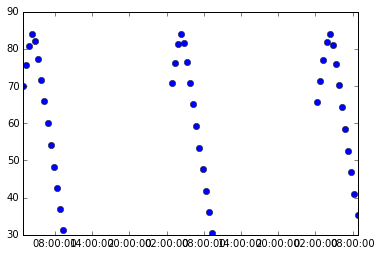

In [19]:
%matplotlib inline
conditions = [sun_is_set, target_is_up, target_at_good_airmass]
def passing_indices(conditions):
    """
    Boolean AND each element of ``conditions`` with each other
    """
    return np.argwhere(reduce(lambda x, y: x*y, conditions)).T[0]
inds = passing_indices(conditions)
print(inds)

plt.plot_date(times.plot_date[inds], target_altaz.alt[inds])
plt.show()